In [8]:
import pandas as pd
import altair as alt
import graphlab as gl
import vincent


#  Number of Papers Graphs

In [9]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/papers_per_year.csv')

df = df.fillna(0)

df = df[df['Year'] <= 2014]
df = df.rename(columns={"Published Papers": "All Published Papers", "Papers Number with at least 5 Refs": "Published Papers with at least 5 Ref"})
df = pd.melt(df, id_vars=["Year"], 
                  var_name="Publication Type", value_name="Total Papers")

df = df.sort_values(by=['Year'])

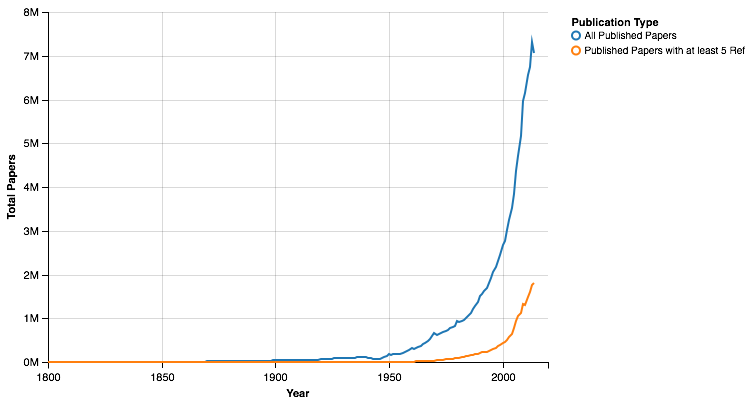

In [10]:
chart = alt.Chart(df).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Total Papers:Q', scale=alt.Scale(zero=False)),
    color="Publication Type"
    

)

chart
#"axis": {"title": "Year","format": "d"}

# New Authors per Year

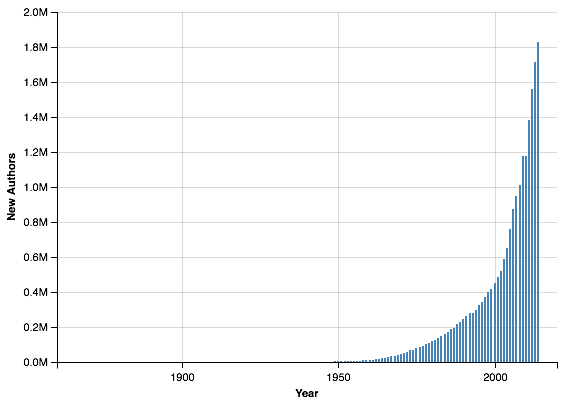

In [11]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/new_authors_per_year.csv')
df = df.rename(columns={'start_year': 'Year'})
df.fillna(0)
df = df[df.Year <= 2014]
chart = alt.Chart(df).mark_bar().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('New Authors:Q', scale=alt.Scale(zero=False))

)
chart

# Papers Refrences over Time

In [12]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/median_and_avg_ref_num_at_least_5_ref.csv')
df = df.rename(columns={"Paper publish year": "Year", "Median Ref Num": "Median", "Avg Ref Num": "Average" })
df = df[df['Year'] <= 2014]
df2 = pd.melt(df, id_vars=["Year"], 
                  var_name="  ", value_name="Paper References Number")



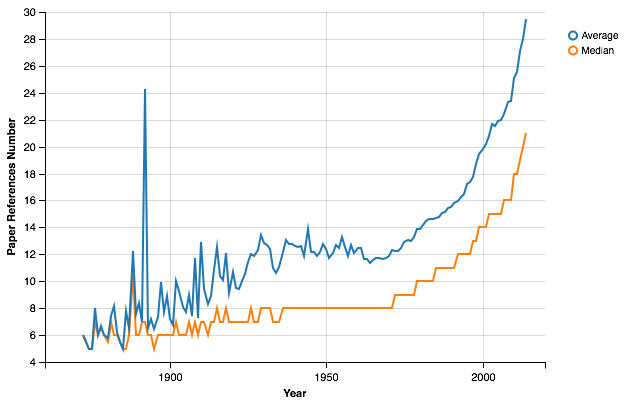

In [13]:
chart = alt.Chart(df2).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Paper References Number:Q', scale=alt.Scale(zero=False)),
    color="  "
    

)

chart

# Self Citations

In [14]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/self_citation_percentage.csv')

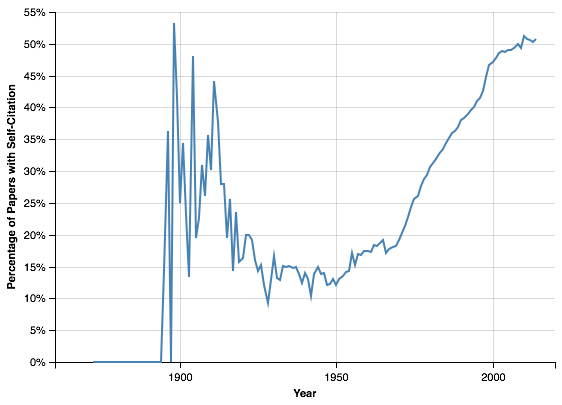

In [15]:
df = df.rename(columns={"Paper publish year": "Year",  "papers_with_self_citations_percentage":"Percentage of Papers with Self-Citation"})
df = df[df['Year'] <= 2014]
chart = alt.Chart(df).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Percentage of Papers with Self-Citation',axis=alt.Axis(format='%'), scale=alt.Scale(zero=False))

)
chart

In [16]:
df

,papers_num,Year,Percentage of Papers with Self-Citation
0,1465111,2011,0.508042
1,0,1883,0.000000
2,86,1920,0.162791
3,7,1895,0.142857
4,43,1916,0.255814
5,3768,1957,0.169321
6,5195,1959,0.175168
7,190340,1990,0.380293
8,205535,1991,0.383000
9,1780539,2014,0.506964


# World Map Plotly

In [17]:
import pycountry
import plotly.plotly as py
import pandas as pd


#Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
def draw_heatmap(y):
    sf = gl.load_sframe('./data/journal_by_country_by_year.sframe')
    sf = sf[sf['Year'] == y]
    sf.rename({'Count': 'Number of Journals'})
    s = set(sf['Code'])
    l = []
    for c in pycountry.countries:
        if c.alpha_3 not in s:
           l.append({'Country': c.name, 'Code': c.alpha_3, 'Year':y, 'Number of Journals':0}) 
    sf2 = gl.SFrame(l).unpack('X1', column_name_prefix='')
    #sf = sf.append(sf2)
    df = sf.to_dataframe()




    data = [ dict(
            type = 'choropleth',
            locations = df['Code'],
            z = df['Number of Journals'],
            text = df['Country'],
            autocolorscale = True,
            reversescale = False,
            marker = dict(
                line = dict (
                    color = 'rgb(0,0,0)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = 'Number of Journals'),
          ) ]

    layout = dict(
        title = '<B>Number of Journals per Country in %s</B>' %y,
        geo = dict(
            showframe = False,
            showcoastlines = True,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    return fig


In [18]:
fig1 = draw_heatmap(1999)
fig2 = draw_heatmap(2015)
py.iplot( fig1, validate=False, filename='d3-world-map' )

This non-commercial license of GraphLab Create for academic use is assigned to fire@cs.washington.edu and will expire on May 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1521047137.log


In [19]:
fig = draw_heatmap(2014)
py.iplot( fig, validate=False, filename='d3-world-map' )

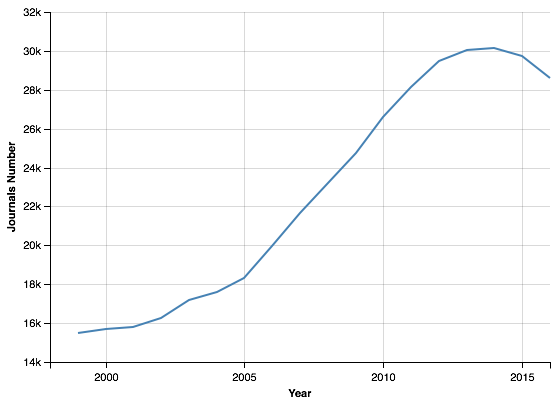

In [20]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/journal_numbers.csv')
df = df.rename(columns={"Count": "Journals Number"})
chart = alt.Chart(df).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Journals Number:Q', scale=alt.Scale(zero=False)),
)
chart

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

sf = gl.load_sframe('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/journal_quartiles.sframe')
sf = sf.sort("Year", ascending=False)
data = []

labels = ['Quartile', 'Total Papers']
annotations = []


domains = [{"x": [0, .48]}, {"x": [.52, 1]}]
label_location = [{"x": 0.21, "y": 0.5}, {"x": 0.79, "y": 0.5}]
sf = sf[sf["Year"].apply(lambda y: y in [1999, 2016])]

for r in sf[:2]:
    l = sorted(r['Quartiles'], key=lambda k: k[0])
    data.append({'values': [i[1] for i in l],
                 'labels': [i[0] for i in l],
                  "name": "%s" % r['Year'],
                  "hoverinfo":"label+value+name",
                  "type": "pie",
                  'textinfo':'percent',
                   "hole": .4,
                   'domain': domains.pop(),

                                  
                })
    d = label_location.pop()
    annotations.append( {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": r['Year'],
                "x": d["x"],
                "y": d["y"]
            })

fig = {
  "data": data,
  "layout": {
        "title":"Papers Quartile over Time ",
            "annotations": annotations
    }

}
data
py.iplot(fig, filename='pie_chart_subplots')


In [22]:
import plotly.plotly as py
from plotly.graph_objs import *

fig = {
    'data': [
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [38, 27, 18, 10, 7],
            'type': 'pie',
            'name': 'Starry Night',
            'marker': {'colors': ['rgb(56, 75, 126)',
                                  'rgb(18, 36, 37)',
                                  'rgb(34, 53, 101)',
                                  'rgb(36, 55, 57)',
                                  'rgb(6, 4, 4)']},
            'domain': {'x': [0, .48],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [28, 26, 21, 15, 10],
            'marker': {'colors': ['rgb(177, 127, 38)',
                                  'rgb(205, 152, 36)',
                                  'rgb(99, 79, 37)',
                                  'rgb(129, 180, 179)',
                                  'rgb(124, 103, 37)']},
            'type': 'pie',
            'name': 'Sunflowers',
            'domain': {'x': [.52, 1],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'

        },
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [38, 19, 16, 14, 13],
            'marker': {'colors': ['rgb(33, 75, 99)',
                                  'rgb(79, 129, 102)',
                                  'rgb(151, 179, 100)',
                                  'rgb(175, 49, 35)',
                                  'rgb(36, 73, 147)']},
            'type': 'pie',
            'name': 'Irises',
            'domain': {'x': [0, .48],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [31, 24, 19, 18, 8],
            'marker': {'colors': ['rgb(146, 123, 21)',
                                  'rgb(177, 180, 34)',
                                  'rgb(206, 206, 40)',
                                  'rgb(175, 51, 21)',
                                  'rgb(35, 36, 21)']},
            'type': 'pie',
            'name':'The Night Café',
            'domain': {'x': [.52, 1],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        }
    ],
    'layout': {'title': 'Van Gogh: 5 Most Prominent Colors Shown Proportionally',
               'showlegend': False}
}

py.iplot(fig, filename='pie_chart_subplots')

# Cross Domain Papers 

In [23]:
#only paper with at least one L0 about 11500160 papers
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/papers_cross_domains.csv')
del df["Median Number of L1"]
del df["Median Number of L0"]
df = df.rename(columns={'Paper publish year': 'Year', 'Average Number of L0': "L0",
                       'Average Number of L1': "L1"})
df.fillna(0)
df = df[df.Year <= 2014]
df = df[df.Year >=1920]

df2 = pd.melt(df, id_vars=["Year"], 
                  var_name="Research Domain Level", value_name="Average Number of Research Domains")
df2

,Year,Research Domain Level,Average Number of Research Domains
0,2014,L0,1.67581
1,2013,L0,1.78060
2,2012,L0,1.79518
3,2011,L0,2.04017
4,2010,L0,2.00151
5,2009,L0,2.15378
6,2008,L0,2.05612
7,2007,L0,1.97890
8,2006,L0,1.94613
9,2005,L0,1.94540


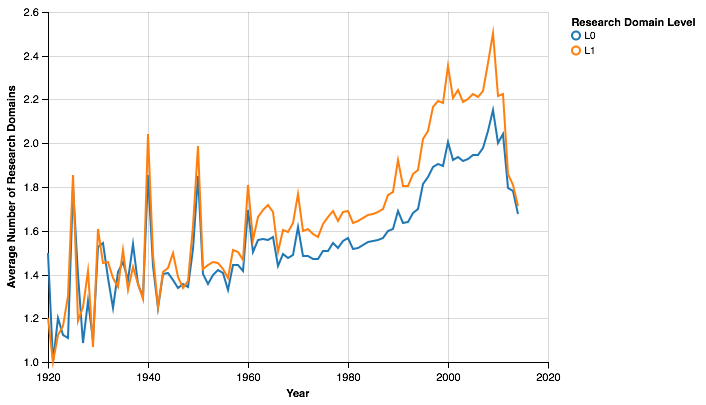

In [24]:
chart = alt.Chart(df2).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Average Number of Research Domains:Q', scale=alt.Scale(zero=False)),
    color="Research Domain Level"
    

)

chart

# No Citations Perecentage

In [25]:
#only paper with at least one L0 about 11500160 papers
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/papers_no_citations_all.csv')
rename_dict ={'Paper publish year': 'Year',
            'zero_citation_percentage_1':'After a year', 
             'zero_citation_percentage_no_self_1':'After a year (Without Self Citations)', } 
for i in [3,5,10]:
    rename_dict['zero_citation_percentage_%s' % i] = 'After %s years' %i
    rename_dict['zero_citation_percentage_no_self_%s' %i ] = 'After %s years (Without Self Citations)' %i
    
df = df.rename(columns=rename_dict)
df = df[df.Year >=1950]
df2 = pd.melt(df, id_vars=["Year"], 
                  var_name="Time Span", value_name="% Papers with No Citations")


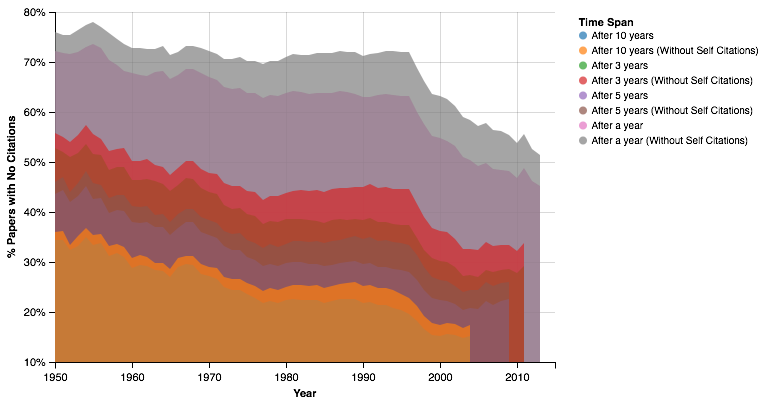

In [26]:
chart = alt.Chart(df2).mark_area().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('% Papers with No Citations', axis=alt.Axis(format='%'), scale=alt.Scale(zero=False)),
    color="Time Span"
    

)

chart

# Average and Median Authors Number

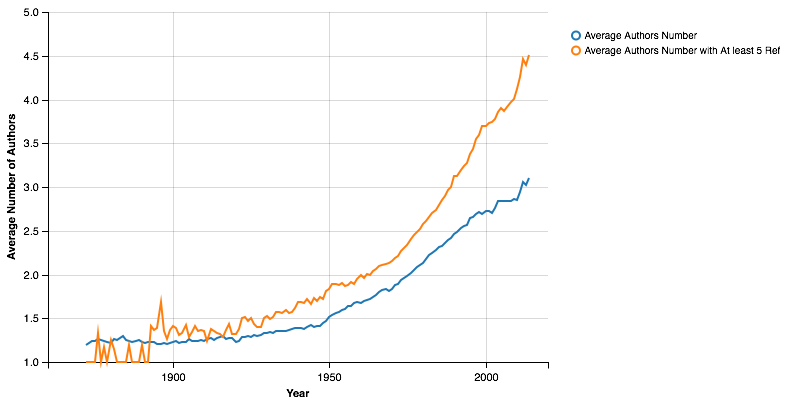

In [27]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/avg_med_new_authors.csv')
rename_dict ={'Paper publish year': 'Year'}
df = df.rename(columns=rename_dict)

del df['Median Authors Number']
del df['Median Authors Number with At least 5 Ref']

df = df[df.Year <= 2014]

df2 = pd.melt(df, id_vars=["Year"], 
                  var_name="  ", value_name="Average Number of Authors")
df2

chart = alt.Chart(df2).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Average Number of Authors:Q', scale=alt.Scale(zero=False)),
    color="  "
    

)

chart



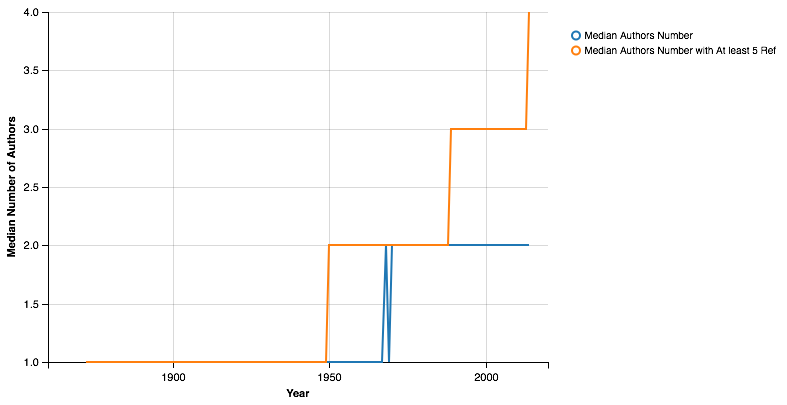

In [28]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/avg_med_new_authors.csv')
rename_dict ={'Paper publish year': 'Year'}
df = df.rename(columns=rename_dict)

del df['Average Authors Number']
del df['Average Authors Number with At least 5 Ref']

df = df[df.Year <= 2014]

df2 = pd.melt(df, id_vars=["Year"], 
                  var_name="  ", value_name="Median Number of Authors")
df2

chart = alt.Chart(df2).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Median Number of Authors:Q', scale=alt.Scale(zero=False)),
    color="  "
    
)

chart

# Journals in the World Per Year Vincent

In [29]:
vincent.initialize_notebook()
world_topo = r'./data/world-countries.topo.json'
geo_data = [{'name': 'countries',
             'url': world_topo,
             'feature': 'world-countries'}]


In [30]:
sf = gl.load_sframe('./data/journal_by_country_by_year.sframe')
sf = sf[sf['Year'] == 2000]
df = sf.to_dataframe()
df = df.fillna(0)
vis = vincent.Map(data=df, geo_data=geo_data, scale=150, 
          data_bind='Count', data_key='Code',
          map_key={'countries': 'id'})
vis.marks[0].properties.enter.stroke_opacity = vincent.ValueRef(value=0.5)
vis

In [31]:
sf = gl.load_sframe('./data/journal_by_country_by_year.sframe')
sf = sf[sf['Year'] == 2015]
df = sf.to_dataframe()
df = df.fillna(0)
vis = vincent.Map(data=df, geo_data=geo_data, scale=150, 
          data_bind='Count', data_key='Code',
          map_key={'countries': 'id'})
vis.marks[0].properties.enter.stroke_opacity = vincent.ValueRef(value=0.5)

vis.rebind(column='Count', brew='RdPu')
vis

In [32]:
vis.to_json('map.json', html_out=True, html_path='map_template.html')

In [33]:
sf = gl.load_sframe('./data/journal_by_country_by_year.sframe')
sf = sf[sf['Year'] == 2000]
df = sf.to_datafra

AttributeError: 'SFrame' object has no attribute 'to_datafra'

In [34]:
import json
import pandas as pd
#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('./data/us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code munging
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes}, dtype=str)
county_df = county_df.astype(int)

#Read into Dataframe, cast to string for consistency
df = pd.read_csv('data/us_county_data.csv', na_values=[' '])
df['FIPS_Code'] = df['FIPS'].astype(str)

#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(df, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')

In [35]:
sf

Country,Count,Year,Code
South Korea,47,2000,KOR
Zimbabwe,3,2000,ZWE
Colombia,9,2000,COL
Cyprus,2,2000,CYP
Kuwait,2,2000,KWT
Hungary,64,2000,HUN
Czech Republic,78,2000,CZE
South Africa,46,2000,ZAF
Latvia,1,2000,LVA
Finland,47,2000,FIN


# Authors Publication Rates Trends

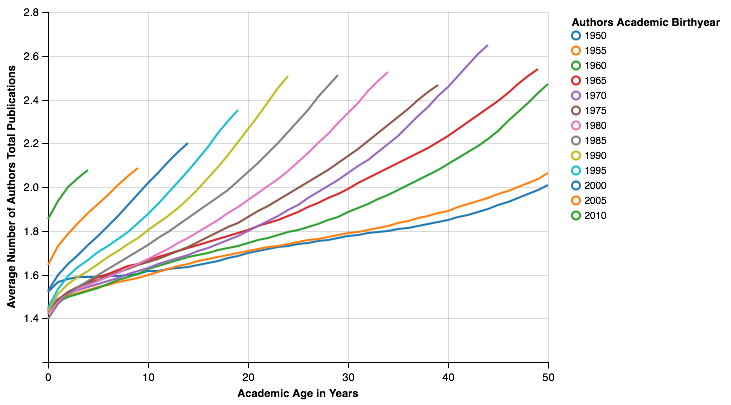

In [41]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/authors_average_total_publications_by_start_year.csv')
df = df.rename(columns={"start_year": "Authors Academic Birthyear"})
df = pd.melt(df, id_vars=["Authors Academic Birthyear"], 
                  var_name="Academic Age in Years", value_name="Average Number of Authors Total Publications")
df = df.sort_values(by=['Authors Academic Birthyear'])
#df['Authors Academic Birthyear'] = df['Authors Academic Birthyear'].astype(basestring)
chart = alt.Chart(df).mark_line().encode(
    alt.X('Academic Age in Years:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Average Number of Authors Total Publications:Q', scale=alt.Scale(zero=False)),
    color="Authors Academic Birthyear:N"

)

chart


In [38]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/authors_average_median_yearly_publication_rate.csv')
df = df[df.start_year <= 2014]
df = df.rename(columns={"start_year": "Authors Academic Birthyear"})
df = pd.melt(df, id_vars=["Authors Academic Birthyear"], 
                  var_name="   ", value_name="Authors Yearly Publications Rate Values")


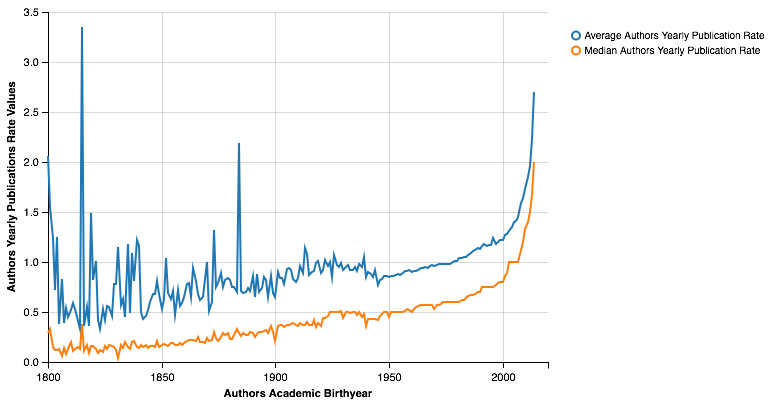

In [41]:
chart = alt.Chart(df).mark_line().encode(
    alt.X('Authors Academic Birthyear:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Authors Yearly Publications Rate Values:Q', scale=alt.Scale(zero=False)),
    color="   "

)

chart

In [11]:
# Female Auhtorship Percentage in Top Ranked Papers Over Time

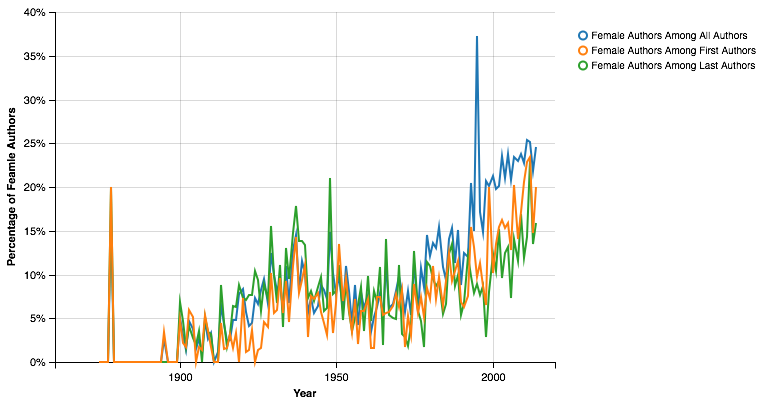

In [42]:
df = pd.read_csv('/Users/michael/Dropbox/academia_eco_system_anlayzer/code/article/data/gender_stat.csv')
df = df.rename(columns={"Paper publish year": "Year", "All Authors Female Percentage": "Female Authors Among All Authors",
                       "First Authors Female Percentage": "Female Authors Among First Authors",
                       "Last Authors Female Percentage": "Female Authors Among Last Authors"})
df = df[df.Year <= 2014]
df = pd.melt(df, id_vars=["Year"], 
                  var_name="   ", value_name="Percentage of Feamle Authors")
df = df.sort_values(by=['Year'])

chart = alt.Chart(df).mark_line().encode(
    alt.X('Year:Q', axis=alt.Axis(format='d'), scale=alt.Scale(zero=False)),
    alt.Y('Percentage of Feamle Authors:Q', axis=alt.Axis(format='%'), scale=alt.Scale(zero=False)),
    color="   "

)

chart

# Journals Return Authors

In [43]:
import json
import plotly.plotly as py
import plotly.graph_objs as go


path = "./data/selected_journals_features/"


def get_trace(name, data_dict):
    if name == "Proceedings of the National Academy of Sciences of the United States of America":
        name = "PNAS"
    xy_list = [(int(x), y) for x,y in data_dict.iteritems() if y != 'NaN' and int(x) <= 2014]
    xy_list = sorted(xy_list, key=lambda k: k[0])
    trace =  go.Scatter(x=[t[0] for t in xy_list], 
                    y = [t[1] for t in xy_list],
                        mode = 'lines',
                        name=name,
                        connectgaps=True)
    return trace

def get_json_plotly_data(j, features_dict):
    traces = []
    
    for k, v in features_dict.iteritems():
        trace = get_trace(v, j[k])
        traces.append(trace)
    return traces


    


In [44]:
#Plot single journal
nature_journal = json.load(file("%s/%s.json" % (path,"Nature")))

features_dict = {'percentage_of_papers_with_authors_that_publish_before_in_the_same_venue': "Return Any Author", 'percentage_of_papers_with_first_authors_that_publish_before_in_the_same_venue': "Return First Author",
           'percentage_of_papers_with_last_authors_that_publish_before_in_the_same_venue': "Return Last Author"
                     }

data = get_json_plotly_data(nature_journal, features_dict)
layout = dict(title = nature_journal['name'],
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Percentage of Papers'),

              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='line-mode')
    
    

In [45]:
#subplots
from plotly import tools
journal_titles_list = ["Nature", "Science", "The New England Journal of Medicine", "The Lancet", "Chemical Society Reviews", "Journal of the American Chemical Society",
                     "Cell", "Advanced Materials", "PNAS", "Chemical Reviews", "Scientific Reports", "PLOS ONE"]
journals_list = ["Nature", "Science", "The New England Journal of Medicine", "The Lancet", "Chemical Society Reviews", "Journal of the American Chemical Society",
                     "Cell", "Advanced Materials", "Proceedings of the National Academy of Sciences of the United States of America", "Chemical Reviews", "Scientific Reports", "PLOS ONE"]


def create_all_journal_feature_return_subplots(feature_name, journals_list, title):
    fig = tools.make_subplots(rows=4, cols=3, subplot_titles=journal_titles_list)
    for i in range(len(journals_list)):
        jname = journals_list[i]

        journal_dict = json.load(file("%s/%s.json" % (path,jname)))
        data = get_trace(jname, journal_dict[feature_name] )
        r = i/3 + 1
        c = i % 3 + 1
        fig.append_trace(data,r, c)
    fig['layout'].update(showlegend=False, title=title)
    return fig


fig = create_all_journal_feature_return_subplots('percentage_of_papers_with_authors_that_publish_before_in_the_same_venue', journals_list,
                                                 "Return Any Author")
py.iplot(fig, filename='simple-subplot-1')


This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]



In [46]:
fig = create_all_journal_feature_return_subplots('percentage_of_papers_with_first_authors_that_publish_before_in_the_same_venue', journals_list, "Return First Author")
py.iplot(fig, filename='simple-subplot-2')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]



In [47]:
fig = create_all_journal_feature_return_subplots('percentage_of_papers_with_last_authors_that_publish_before_in_the_same_venue', journals_list, "Return Last Author")
py.iplot(fig, filename='simple-subplot-1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]



# Journals Authors Age

In [50]:
features_dict = {"authors_median_age": "All Authors", "first_authors_median_age": "First Authors", "last_authors_median_age": "Last Authors" }
science_journal = json.load(file("%s/%s.json" % (path,"Science")))
data = get_json_plotly_data(science_journal, features_dict)
layout = dict(title = science_journal['name'],
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Median Age'),

              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='line-mode')

In [51]:
fig = create_all_journal_feature_return_subplots('authors_median_age', journals_list,
                                                 "Authors Median Age")
py.iplot(fig, filename='simple-subplot-1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]



In [49]:
fig = create_all_journal_feature_return_subplots('first_authors_median_age', journals_list,
                                                 "First Authors Median Age")
py.iplot(fig, filename='simple-subplot-1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]



In [53]:
fig = create_all_journal_feature_return_subplots('last_authors_median_age', journals_list,
                                                 "Last Authors Median Age")
py.iplot(fig, filename='simple-subplot-1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]

